In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('/home/bk/Desktop/mlai/Notes/Day 24/Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data=data.drop(['ID','ZIP Code'],axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
y=data[['Personal Loan']]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [5]:
X=data.drop(['Personal Loan'],axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
rf_model.fit(X,y)

/home/bk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
rf_model.oob_score_

0.9874

In [9]:
for feature,imp in zip(X,rf_model.feature_importances_):
    print(feature,imp);

Age 0.04571424888527792
Experience 0.044395560276941436
Income 0.344311972928967
Family 0.09457796038290027
CCAvg 0.1847219403142709
Education 0.16060658532592595
Mortgage 0.04472133004480244
Securities Account 0.005752419060162685
CD Account 0.05665495877039838
Online 0.008603693187381951
CreditCard 0.009939330822971009


In [10]:
from sklearn import tree
predictors=data[['Income','CCAvg','Education']]
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(X=predictors,y=data['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
with open('Dtree_loan.dot','w')as f:
    f=tree.export_graphviz(tree_model,feature_names=['Income','CCAvg','Education'],out_file=f);

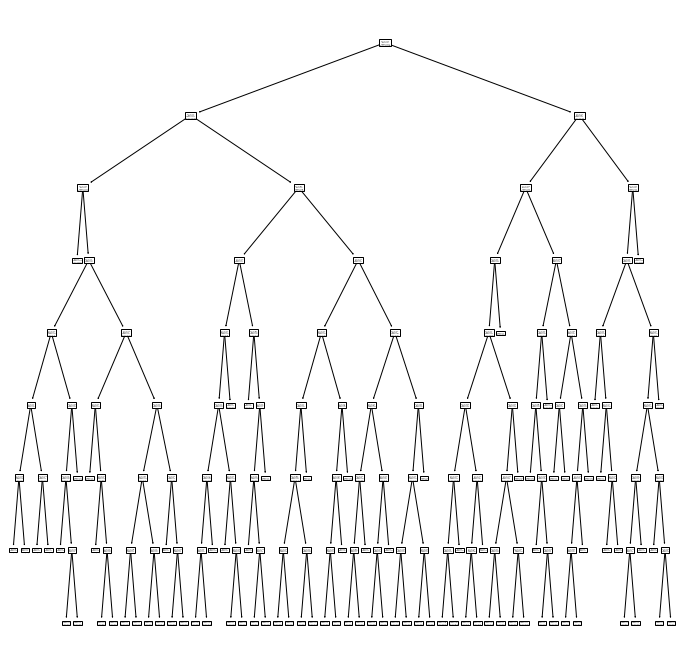

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
tree.plot_tree(tree_model)
plt.show()


# inferences/ rules

1. Customer having income less than 106.5 dollars and CCavg less than 2.95 dollars will not get loan.

2. Customer having income greater than 116.5 dollars with education level of either Graduate or Advanced/Professional will get the loan.

3. Customer having income greater than 106.5 dollars and less than 113.5 with education level of either Graduate or Advanced/Professional and CCavg less than 0.3 dollars will not get the loan.

4. Customer having income greater than 109.5 dollars and less than 113.5 with education level of Undergraduate or and CCavg greater than 0.3 dollars and less than 2.95 dollars will not get get the loan.

5. Customer having income less than 81.5 dollars with CCavg greater than 3.55 dollars will not get the loan.

6. Customer having income less than 82.5 dollars bnt greater than 81.5 dollars with CCavg greater than 3.75 dollars will not get the loan.